# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751652 sha256=6e78b6e92c00e82e784ff8f9112c5d9bb039524d98706199b2dab9b7b70f7e39
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [4]:
df=pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [9]:
px.area(df,x="Date", y="Close")

In [10]:
px.line(df, x="Date", y="Close")

In [11]:
px.area(df, x="Date", y="Volume")

In [13]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

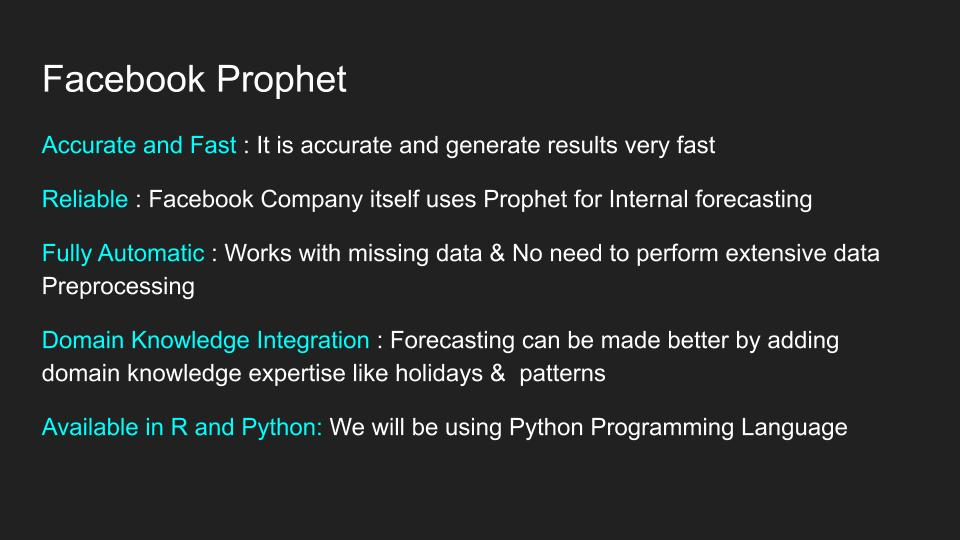

## Data Preperation

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [15]:
columns=["Date","Close"]
ndf  = pd.DataFrame(df, columns = columns)

In [16]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [17]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [18]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [19]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3pkmaymi/cxoytftm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3pkmaymi/nco224z6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84241', 'data', 'file=/tmp/tmp3pkmaymi/cxoytftm.json', 'init=/tmp/tmp3pkmaymi/nco224z6.json', 'output', 'file=/tmp/tmp3pkmaymi/prophet_modelobtmlo4d/prophet_model-20250110180637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [20]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.595927,-27.858518,140.579283,65.595927,65.595927,-5.865172,-5.865172,-5.865172,-5.865172,-5.865172,-5.865172,0.0,0.0,0.0,59.730755
1,2020-03-17,67.391416,-19.159243,155.843674,67.391416,67.391416,-2.385019,-2.385019,-2.385019,-2.385019,-2.385019,-2.385019,0.0,0.0,0.0,65.006396
2,2020-03-18,69.186904,-17.182762,147.731682,69.186904,69.186904,-3.495171,-3.495171,-3.495171,-3.495171,-3.495171,-3.495171,0.0,0.0,0.0,65.691733
3,2020-03-19,70.982392,-18.725835,151.026235,70.982392,70.982392,-3.844268,-3.844268,-3.844268,-3.844268,-3.844268,-3.844268,0.0,0.0,0.0,67.138125
4,2020-03-20,72.777881,-21.681976,157.766322,72.777881,72.777881,-7.762427,-7.762427,-7.762427,-7.762427,-7.762427,-7.762427,0.0,0.0,0.0,65.015454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.284403,814.206342,980.936545,899.171510,901.500600,-3.495171,-3.495171,-3.495171,-3.495171,-3.495171,-3.495171,0.0,0.0,0.0,896.789232
277,2021-04-08,902.741475,813.985916,980.006743,901.566665,904.040032,-3.844268,-3.844268,-3.844268,-3.844268,-3.844268,-3.844268,0.0,0.0,0.0,898.897207
278,2021-04-09,905.198547,805.596922,978.587829,903.939479,906.579207,-7.762427,-7.762427,-7.762427,-7.762427,-7.762427,-7.762427,0.0,0.0,0.0,897.436120
279,2021-04-10,907.655619,837.983385,1013.255037,906.351656,909.127436,11.676026,11.676026,11.676026,11.676026,11.676026,11.676026,0.0,0.0,0.0,919.331645


In [ ]:
px.line(forecast, x='ds', y='yhat')

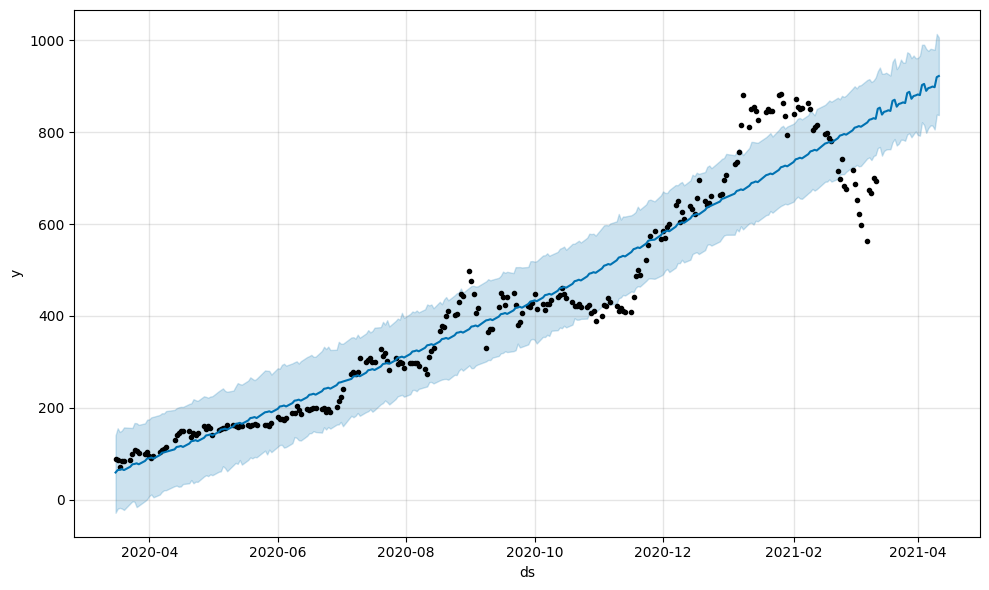

In [22]:
figure = m.plot(forecast, xlabel = 'ds', ylabel='y')

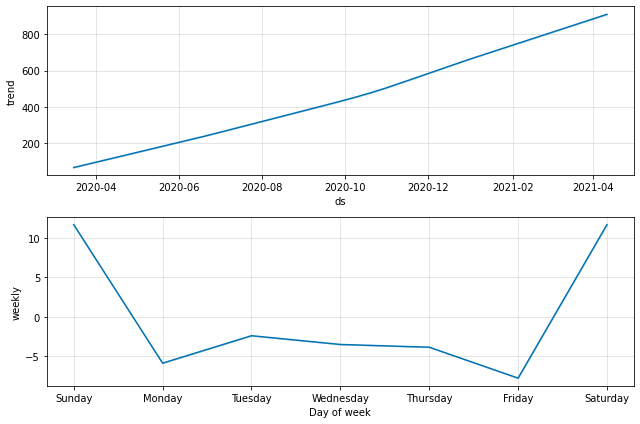

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [23]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>